In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
base_bank = pd.read_csv("../01_base/bank.csv")

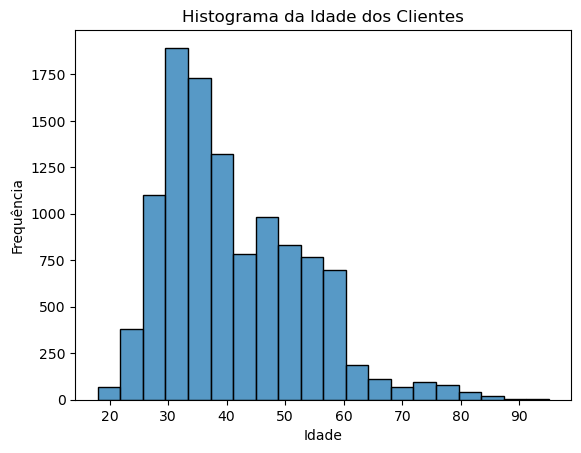

In [14]:
#* 📊 **Exercício 11:** Histograma da idade dos clientes.
sns.histplot(base_bank['age'], bins=20, kde=False)
plt.title('Histograma da Idade dos Clientes')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.savefig("../03_saida/historiograma_idade.png", dpi=300, bbox_inches="tight")
plt.show()